In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = "data_sih.csv"
df = pd.read_csv(data)
df


,Task_Name,Timer
0,Integration chap,1:30:00
1,javascript chap,2:15:00
2,python chap,1:00:00
3,C chap,1:00:00
4,C# chap,1:30:00
...,...,...
195,prepare questions for interview,3:20:00
196,buy medicines,0:40:00
197,Start PSNA,2:15:00
198,installing Android Studio,0:10:00


In [3]:
df.Task_Name

0                     Integration chap
1                      javascript chap
2                          python chap
3                               C chap
4                              C# chap
                    ...               
195    prepare questions for interview
196                      buy medicines
197                         Start PSNA
198          installing Android Studio
199                      Setup Flutter
Name: Task_Name, Length: 200, dtype: object

In [4]:
df.Timer

0      1:30:00
1      2:15:00
2      1:00:00
3      1:00:00
4      1:30:00
        ...   
195    3:20:00
196    0:40:00
197    2:15:00
198    0:10:00
199    0:40:00
Name: Timer, Length: 200, dtype: object

In [5]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
# ENCODING THE TASK NAME
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Task_Name'] = le.fit_transform(df['Task_Name'])
df['Timer'] = le.fit_transform(df['Timer'])

# Split the data into train and test sets
X = df.drop(['Timer'], axis=1)
y = df.Timer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

#`Evaluate the model performance
# print(confusion_matrix(y_test, y_pred))


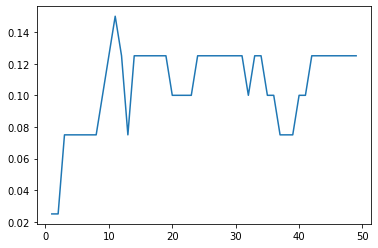

In [7]:
# elbow method to find the best k value
x, y = [], []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    x.append(i)
    y.append(accuracy_score(y_test, y_pred))
plt.plot(x, y)

In [8]:
# Accuracy Score
print(accuracy_score(y_test, y_pred)*100)

12.5


In [9]:
# costumized classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.20      1.00      0.33         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
          10       0.08      0.33      0.12         3
          14       0.00      0.00      0.00         1
          15       0.07      0.50      0.12         2
          20       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         2
          31       0.25      0.50      0.33         4
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00    

/Users/divyeshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/divyeshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/divyeshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [14]:
cust_y_pred = knn.predict([[6]])
print(cust_y_pred)

[31]


/Users/divyeshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


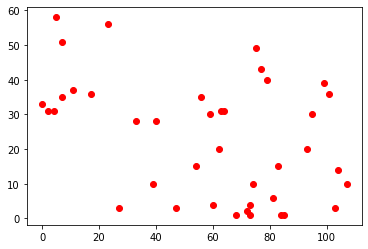

In [11]:
# Predict the test set results
y_pred = knn.predict(X_test)
# plot the data

plt.scatter(X_test.Task_Name, y_test, color='red')

In [12]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

2.5


In [13]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)


2.5
